In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Ramka danych MNIST

In [2]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Define parameters
input_dim = 784
hidden_dim = 64
sparsity_level = 0.05
lambda_sparse = 0.1

# Definicja prostego AE


In [4]:
# Build the autoencoder model
inputs = layers.Input(shape=(input_dim,))
encoded = layers.Dense(hidden_dim, activation='relu')(inputs)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)

In [5]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

# Funkcja straty i trenowanie modelu

In [6]:
def sparse_loss(y_true, y_pred):
    mse_loss = tf.reduce_mean(keras.losses.MeanSquaredError()(y_true, y_pred))
    hidden_layer_output = encoder(y_true)
    mean_activation = tf.reduce_mean(hidden_layer_output, axis=0)

    kl_divergence = tf.reduce_sum(sparsity_level * tf.math.log(sparsity_level / (mean_activation + 1e-10)) +
                                  (1 - sparsity_level) * tf.math.log((1 - sparsity_level) / (1 - mean_activation + 1e-10)))

    return mse_loss + lambda_sparse * kl_divergence

In [7]:
autoencoder.compile(optimizer='adam', loss=sparse_loss)

In [8]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.2510 - val_loss: 0.1384
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1115 - val_loss: 0.1027
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0795 - val_loss: 0.0900
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0653 - val_loss: 0.0858
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0575 - val_loss: 0.0847
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0525 - val_loss: 0.0781
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0492 - val_loss: 0.0766
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0469 - val_loss: 0.0749
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0453 - val_loss: 0.0728
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436 - val_loss: 0.0725
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0420 - val_loss: 0.0711
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/ste

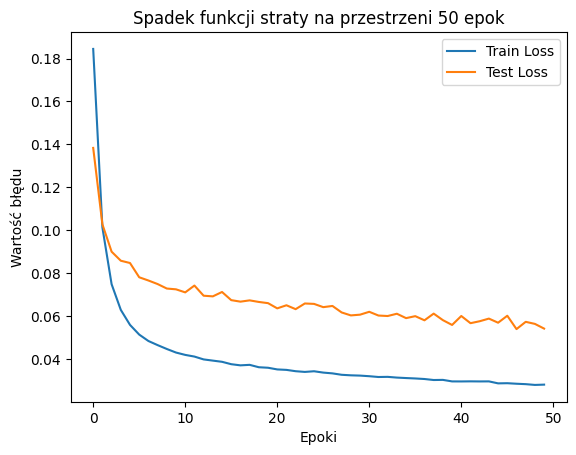

In [9]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Spadek funkcji straty na przestrzeni 50 epok')
plt.xlabel('Epoki')
plt.ylabel('Wartość błędu')
plt.legend()
plt.show()

In [ ]:
# Reconstruct the inputs
reconstructed = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# WYniki

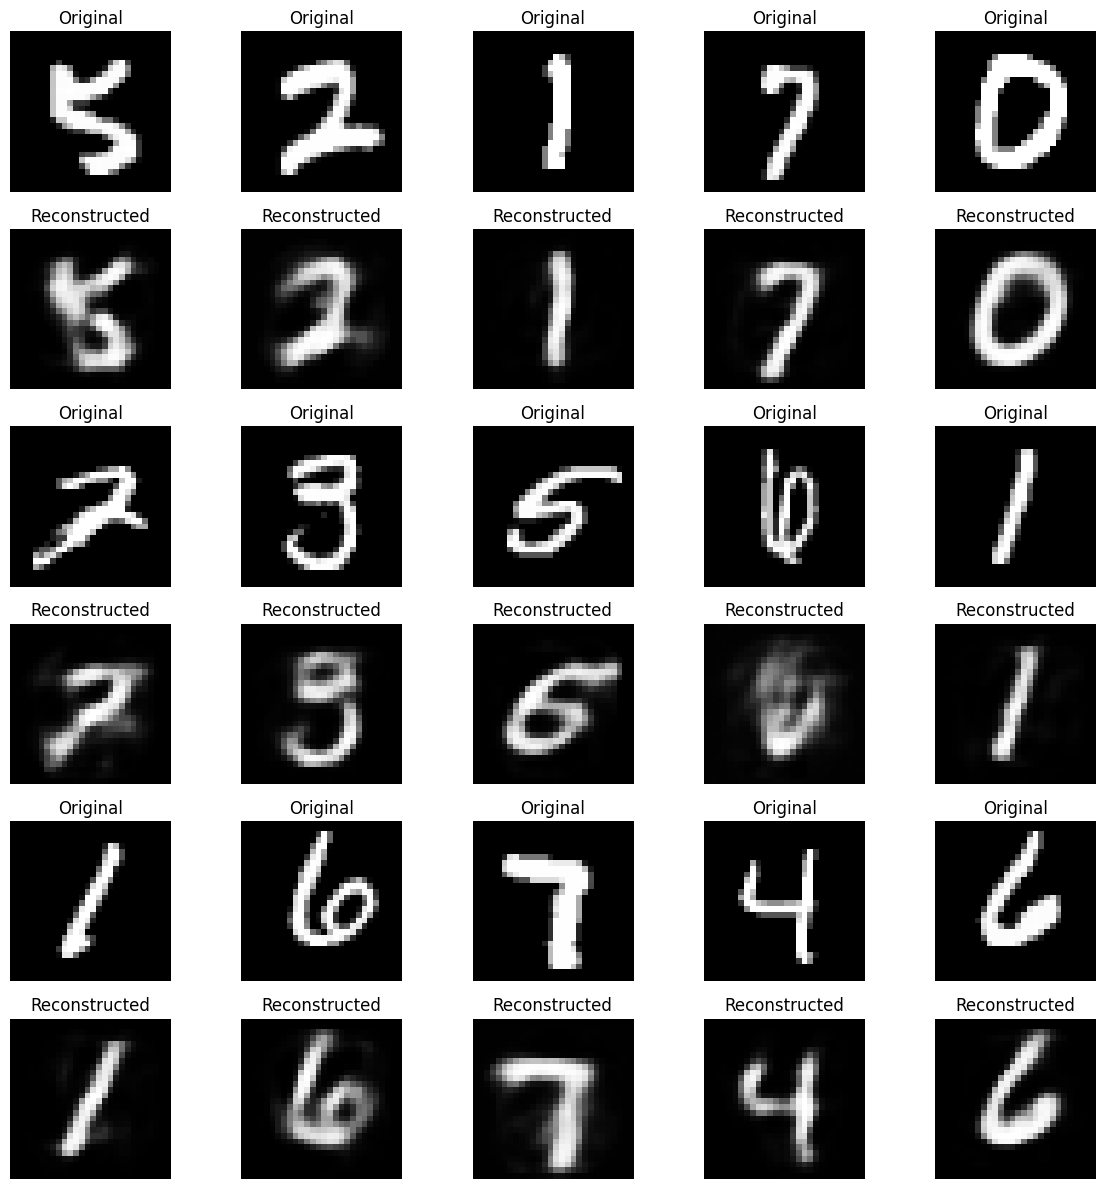

In [ ]:
# Liczba obrazów w wierszu
n = 5

# Losowe indeksy obrazów
random_indices = np.random.choice(len(x_test), n * 3, replace=False)  # 3 wiersze po n obrazów

# Tworzenie siatki 6x6
plt.figure(figsize=(12, 12))
for i in range(1, 7):  # Wiersze od 1 do 6
    for j in range(1, n + 1):  # Kolumny od 1 do n
        idx = (i - 1) // 2 * n + (j - 1)  # Oblicz indeks obrazu w zależności od wiersza i kolumny

        # Oryginalne obrazy w wierszach 1, 3, 5
        if i % 2 == 1:
            ax = plt.subplot(6, n, (i - 1) * n + j)
            plt.imshow(x_test[random_indices[idx]].reshape(28, 28), cmap='gray')
            plt.title("Original")
            plt.axis('off')

        # Odtworzone obrazy w wierszach 2, 4, 6
        else:
            ax = plt.subplot(6, n, (i - 1) * n + j)
            plt.imshow(reconstructed[random_indices[idx]].reshape(28, 28), cmap='gray')
            plt.title("Reconstructed")
            plt.axis('off')

plt.tight_layout()
plt.show()

# Wykres średniej aktywacji neuronów

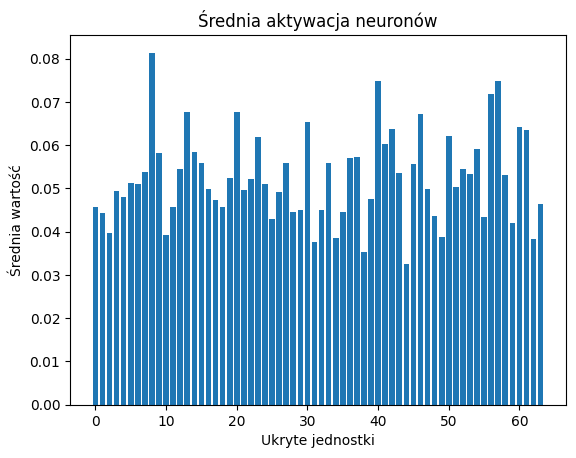

In [ ]:

mean_activation = np.mean(encoded_outputs, axis=0)
plt.bar(range(len(mean_activation)), mean_activation)
plt.title("Średnia aktywacja neuronów")
plt.xlabel("Ukryte jednostki")
plt.ylabel("Średnia wartość")
plt.show()